<a href="https://colab.research.google.com/github/bhavika2222/bhavika/blob/main/DL4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use Autoencoder to implement anomaly detection. Build the model by using:

a. Import required libraries

b. Upload / access the dataset

c. Encoder converts it into latent representation

d. Decoder networks convert it back to the original input

e. Compile the models with Optimizer, Loss, and Evaluation Metrics

---



(4998, 141)
Epoch 1/20
5/5 [==============================] - 7s 159ms/step - loss: 0.0109 - mse: 0.0245 - val_loss: 0.0132 - val_mse: 0.0306
Epoch 2/20
5/5 [==============================] - 0s 34ms/step - loss: 0.0105 - mse: 0.0235 - val_loss: 0.0128 - val_mse: 0.0297
Epoch 3/20
5/5 [==============================] - 0s 28ms/step - loss: 0.0096 - mse: 0.0216 - val_loss: 0.0125 - val_mse: 0.0290
Epoch 4/20
5/5 [==============================] - 0s 35ms/step - loss: 0.0086 - mse: 0.0192 - val_loss: 0.0122 - val_mse: 0.0283
Epoch 5/20
5/5 [==============================] - 0s 27ms/step - loss: 0.0076 - mse: 0.0170 - val_loss: 0.0117 - val_mse: 0.0271
Epoch 6/20
5/5 [==============================] - 0s 41ms/step - loss: 0.0067 - mse: 0.0149 - val_loss: 0.0113 - val_mse: 0.0262
Epoch 7/20
5/5 [==============================] - 0s 46ms/step - loss: 0.0060 - mse: 0.0133 - val_loss: 0.0107 - val_mse: 0.0248
Epoch 8/20
5/5 [==============================] - 0s 30ms/step - loss: 0.0055 - mse:

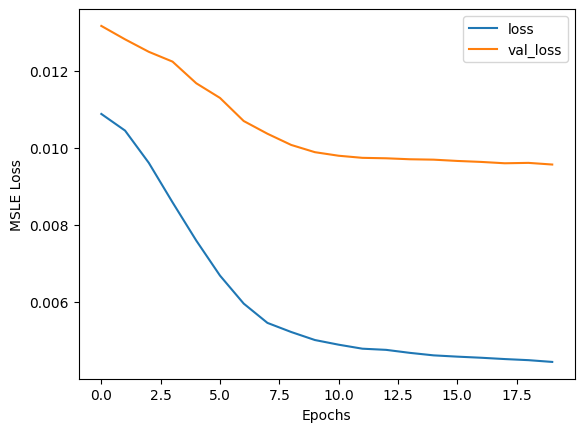

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

# Download the dataset
path = '''http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'''
data = pd.read_csv(path, header=None)
print(data.shape)
data.head()


#Split the data for training and testing
# last column is the target
# 0 = anomaly, 1 = normal

TARGET = 140

features = data.drop(TARGET, axis=1)
target = data[TARGET]

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2,
    random_state = 0, stratify=target
)
x_test.shape
x_train.shape
target.value_counts()

# use case is novelty detection so use only the normal data
# for training

train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

#Scale the data using MinMaxScaler
min_max_scaler = MinMaxScaler()
x_train_scaled = min_max_scaler.fit_transform(
    train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())
x_train.describe()
pd.DataFrame(x_train_scaled).describe()

#Build an AutoEncoder model
# create a model by subclassing Model class in tensorflow
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units

  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded
model = AutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

#Plot history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()
